In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [3]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)
print(x.shape)
print(y.shape)

(200, 2)
(200, 1)


Use `least_squares` to compute w, and visualize the results.

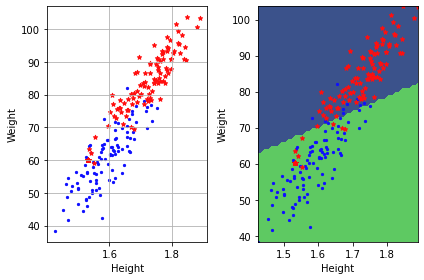

In [7]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # Add the 
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # print(tx.shape)
    # print(y.shape)
    
    # w = least squares with respect to tx
    w, loss = least_squares(y, tx)
    # print(w.shape)
    
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [8]:
def sigmoid(t):
    """apply sigmoid function on t."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    sigmoid = 1.0 / (1.0 + np.exp(-t))
    return sigmoid
    

In [14]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    sigmoid_pred = sigmoid(tx.dot(w))
    loss = -(y.T.dot(np.log(sigmoid_pred))
                     + (1 - y).T.dot(np.log(1 - sigmoid_pred)))
    loss = np.squeeze(loss)
    
    return loss


In [15]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    sigmoid_pred = sigmoid(tx.dot(w))
    grad = tx.T.dot(sigmoid_pred - y)
    
    return grad

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [16]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # Compute the cost and grad
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    
    # Update w
    w = w - gamma * grad
    
    return loss, w

Demo!

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=43.46403230562902
Current iteration=200, loss=41.545892808759405
Current iteration=300, loss=41.098638973663114
Current iteration=400, loss=40.96487063560558
Current iteration=500, loss=40.92008945871305
Current iteration=600, loss=40.90418744318991
Current iteration=700, loss=40.89834994668996
Current iteration=800, loss=40.89616496609549
Current iteration=900, loss=40.89533753382109
Current iteration=1000, loss=40.895021964118996
Current iteration=1100, loss=40.894901086855555
Current iteration=1200, loss=40.89485466141426
Current iteration=1300, loss=40.89483680124478
Current iteration=1400, loss=40.894829923283595
Current iteration=1500, loss=40.89482727289551
loss=40.89482664256953


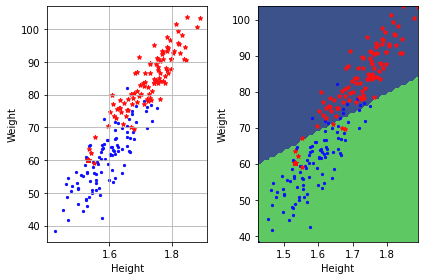

In [17]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [18]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    # np.multiply: element-wise multiplication; np.dot: matrix dot product(matrix multiplication)
    # calculate hessian: TODO
    sigmoid_pred = sigmoid(tx.dot(w))
    
    # Generate a diagonal matrix for values of sigmoid_pred
    # Use its transpose form to generate a 1D array of sigmoid prediction values
    sigmoid_pred = np.diag(sigmoid_pred.T[0])
    
    # Use element-wise multiplication to get the diagonal matrix S
    S = np.multiply(sigmoid_pred, (1 - sigmoid_pred))
    
    # Calculate the hessian of L(w)
    hessian = tx.T.dot(S).dot(tx)
    
    return hessian
    

Write a function below to return loss, gradient, and hessian.

In [19]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # return loss, gradient, and hessian
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    
    return loss, grad, hessian
    

### Using Newton's method
Use Newton's method for logistic regression.

In [28]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # return loss, gradient and hessian
    loss, grad, hessian = logistic_regression(y, tx, w)
    
    # update w, H(w*)w = H(w*)w* - grad(L(w*))
    w -= np.linalg.solve(hessian, grad)
    
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=63.4115537390958
Current iteration=2, the loss=47.30458619935057
Current iteration=3, the loss=41.99746742248446
Current iteration=4, the loss=40.95639863723794
Current iteration=5, the loss=40.89511993648958
Current iteration=6, the loss=40.89482561762708
Current iteration=7, the loss=40.894825609890574
loss=40.89482560989059


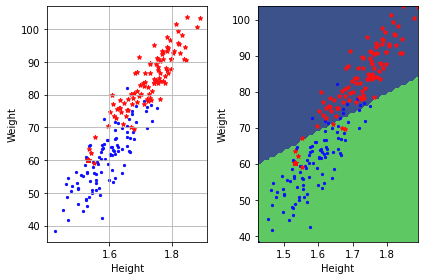

In [29]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [34]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # return loss, gradient, and hessian
    loss = np.squeeze(calculate_loss(y, tx, w) + lambda_ * (w.T.dot(w)))
    grad = calculate_gradient(y, tx, w) + 2 * lambda_ * w
    hessian = calculate_hessian(y, tx, w) + 2 * lambda_
    
    return loss, grad, hessian
    

In [35]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    
    # return loss, gradient
    loss, grad, _ = penalized_logistic_regression(y, tx, w, lambda_)
    
    # update w
    w = w - gamma * grad
    
    return loss, w

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=46.076072692504965
Current iteration=200, loss=45.136990805865345
Current iteration=300, loss=45.02816989532987
Current iteration=400, loss=45.013256927182994
Current iteration=500, loss=45.011094778803134
Current iteration=600, loss=45.01077474325605
Current iteration=700, loss=45.01072699869884
Current iteration=800, loss=45.01071985437807
loss=41.80587008659321


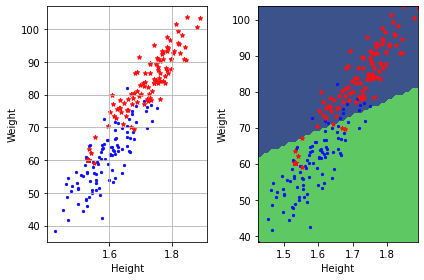

In [36]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)